In [36]:
import ee
import os
import geehydro
import folium
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:10809'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:10809'
ee.Initialize()

In [37]:
Map = folium.Map(location=[40, -100], zoom_start=4)
Map.setOptions('HYBRID')

In [38]:
year_dic = {34:1985,33:1986,32:1987,31:1988,
            30:1989,29:1990,28:1991,27:1992,26:1993,25:1994,24:1995,23:1996,22:1997,21:1998,
            20:1999,19:2000,18:2001,17:2002,16:2003,15:2004,14:2005,13:2006,12:2007,11:2008,
            10:2009, 9:2010, 8:2011, 7:2012, 6:2013, 5:2014, 4:2015, 3:2016, 2:2017, 1:2018,} 
        # greater than or equal  1 = urban 2018
year = 1

In [39]:
center = ee.FeatureCollection("users/zhouzz400/city_center").filter(
    [ee.Filter.eq("MEGACITY",1),ee.Filter.eq("name_zh","上海")]).geometry()
print(center)

ee.Geometry({
  "type": "Invocation",
  "arguments": {
    "collection": {
      "type": "Invocation",
      "arguments": {
        "collection": {
          "type": "Invocation",
          "arguments": {
            "tableId": "users/zhouzz400/city_center"
          },
          "functionName": "Collection.loadTable"
        },
        "filter": [
          {
            "type": "Invocation",
            "arguments": {
              "leftField": "MEGACITY",
              "rightValue": 1
            },
            "functionName": "Filter.equals"
          },
          {
            "type": "Invocation",
            "arguments": {
              "leftField": "name_zh",
              "rightValue": "\u4e0a\u6d77"
            },
            "functionName": "Filter.equals"
          }
        ]
      },
      "functionName": "Collection.filter"
    }
  },
  "functionName": "Collection.geometry"
})


In [56]:
shanghai = ee.Image("users/zhouzz400/shanghai_GAIA")
#Viz_GAIA = {"min": 1, "max": 34, "palette": ['FFFFFF', 'FF0000']}
# Map.addLayer(shanghai,Viz_GAIA)

sh_year = shanghai.gte(year)
#Viz_year = {"min": 0, "max": 1, "palette": ['FFFFFF', 'FF0000']}
#Map.addLayer(sh_year,Viz_year,"sh_year")

water = ee.Image("JRC/GSW1_1/YearlyHistory/"+str(year_dic[year])).gte(2)
# Viz_water = {"min": 0, "max": 1, "palette": ["ffffff","0000ff"]}
# Map.addLayer(water,Viz_water,"water")

# center = ee.Geometry.Point([121.46851393726786, 31.224416065753665])
buffer = ee.List([])
print(buffer)
ring = ee.List([])
dens = ee.List([])
for i in range(30):
    dis = 1000*(i+1)
    buffer.add( center.buffer(dis) )
    
    if i == 0:
        ring.add(buffer.get(i))
    else:
        ring.add( ee.Geometry(buffer.get(i)).symmetricDifference(buffer.get(i-1)) )
        
    #Map.addLayer(ring.get(i))
    ring_urban = sh_year.eq(1).clip(ring.get(i))
    urban_image = ring_urban.multiply(ee.Image.pixelArea())
    urban_area = ee.Number( urban_image.reduceRegion(**{"reducer": ee.Reducer.sum(),"scale": 30,"maxPixels": 1e9}).get("b1") )
    
    ring_water = water.eq(1).clip(ring.get(i))
    water_image = ring_water.multiply(ee.Image.pixelArea())
    water_area = ee.Number( water_image.reduceRegion(**{"reducer": ee.Reducer.sum(),"scale": 30,"maxPixels": 1e9}).get("waterClass") )
    
    ring_area = ring.getGeometry(i).area()
#     print(ee.Number(ring.get(i)))
#     print(ring_area,water_area,urban_area)
    Denominator = ring_area.subtract( water_area )
    dens.add( urban_area.divide(Denominator) )
#     if dens[i] <= 0.1:
#         break
    print(dens.get(i))

ee.List([])
ee.Number({
  "type": "Invocation",
  "arguments": {
    "list": [],
    "index": 0
  },
  "functionName": "List.get"
})
ee.Number({
  "type": "Invocation",
  "arguments": {
    "geometry": {
      "type": "Invocation",
      "arguments": {
        "list": [],
        "index": 0
      },
      "functionName": "List.getGeometry"
    }
  },
  "functionName": "Geometry.area"
}) ee.Number({
  "type": "Invocation",
  "arguments": {
    "dictionary": {
      "type": "Invocation",
      "arguments": {
        "image": {
          "type": "Invocation",
          "arguments": {
            "image1": {
              "type": "Invocation",
              "arguments": {
                "input": {
                  "type": "Invocation",
                  "arguments": {
                    "image1": {
                      "type": "Invocation",
                      "arguments": {
                        "image1": {
                          "type": "Invocation",
                          

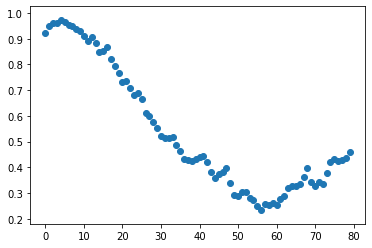

In [31]:
import matplotlib.pyplot as plt
plt.scatter([i for i in range(80)],dens)
#%matplotlib.inline